<a href="https://colab.research.google.com/github/michellecorreaa/Python01/blob/main/Profissional_Dados_DataHacker_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Dados dos Profissionais de DS no Brasil

Base de dados retirado de :
https://www.kaggle.com/datahackers/pesquisa-data-hackers-2019

In [1]:
#Importando a biblioteca Pandas
import pandas as pd

In [ ]:
dados = pd.read_csv("/content/datahackers-survey-2019-anonymous-responses.csv")
dados

In [ ]:
#Verificando dados faltantes, transformando em booleanos

dados.isnull()

In [ ]:
#Media de valores faltantes de cada variável
dados.isnull().mean()[ dados.isnull().sum() != 0 ].sort_values(ascending = False)

In [10]:
#Faixas salariais do conjunto de dados utilizando Value_counts()
dados["('P16', 'salary_range')"].value_counts()

de R$ 4.001/mês a R$ 6.000/mês      308
de R$ 8.001/mês a R$ 12.000/mês     237
de R$ 6.001/mês a R$ 8.000/mês      229
de R$ 3.001/mês a R$ 4.000/mês      219
de R$ 1.001/mês a R$ 2.000/mês      181
de R$ 2.001/mês a R$ 3000/mês       150
de R$ 12.001/mês a R$ 16.000/mês     82
Menos de R$ 1.000/mês                48
de R$ 16.001/mês a R$ 20.000/mês     45
de R$ 20.001/mês a R$ 25.000/mês     15
Acima de R$ 25.001/mês               13
Name: ('P16', 'salary_range'), dtype: int64

In [12]:
#Para saber a média salarial em relação a todos os profissionais entrevistados:
#Atribuir pré processamento, usando um dicionario:

salamap = {'Menos de R$ 1.000/mês': 1000,
      'de R$ 1.001/mês a R$ 2.000/mês': 1500, 
       'de R$ 2.001/mês a R$ 3000/mês': 2500,
      'de R$ 3.001/mês a R$ 4.000/mês': 3500,
      'de R$ 4.001/mês a R$ 6.000/mês': 5000, 
      'de R$ 6.001/mês a R$ 8.000/mês': 7000,
     'de R$ 8.001/mês a R$ 12.000/mês': 10000,
    'de R$ 12.001/mês a R$ 16.000/mês': 14000,
    'de R$ 16.001/mês a R$ 20.000/mês': 18000,
    'de R$ 20.001/mês a R$ 25.000/mês': 22500, 
              'Acima de R$ 25.001/mês': 25000}
              
dados['salario'] = dados["('P16', 'salary_range')"].map(salamap)

In [16]:
#Salario medio dos Profissionais Entrevistados
salario_medio = round(dados['salario'].mean(),2)
salario_medio

6283.24

In [21]:
#Como o conjunto de dados é de 2019, fazendo uma estimativa para 2022
salario_medio_atual= round(dados['salario'].mean() * 1.15 ,2)
salario_medio_atual

7225.72

In [24]:
#Profissões mencionadas pelos entrevistados

dados["('D6', 'anonymized_role')"].value_counts()

Desenvolvedor ou Engenheiro de Software    225
Outras                                     220
Data Scientist/Cientista de Dados          167
Data Analyst/Analista de Dados             163
Business Intelligence/Analista de BI       150
Data Engineer/Engenheiro de Dados          130
Business Analyst/Analista de Negócios       72
Analista de Inteligência de Mercado         29
Engenheiro                                  26
Analista de Marketing                       19
Engenheiro de Machine Learning              15
DBA/Administrador de Banco de Dados         14
Estatístico                                 11
Economista                                  10
Name: ('D6', 'anonymized_role'), dtype: int64

In [ ]:
#Profissões mencionadas pelos entrevistados
#Criando variaveis mais convenientes
#Pré processamento básico

profmap = {'Desenvolvedor ou Engenheiro de Software': 'Desenvolvedor/Engenheiro de Software', 
                                            'Outras': 'Outras',
                 'Data Scientist/Cientista de Dados': 'Cientista de Dados',
                    'Data Analyst/Analista de Dados': 'Analista de Dados',
              'Business Intelligence/Analista de BI': 'Analista de BI',
                 'Data Engineer/Engenheiro de Dados': 'Engenheiro de Dados',
             'Business Analyst/Analista de Negócios': 'Analista de BI',
               'Analista de Inteligência de Mercado': 'Analista de BI',
                                        'Engenheiro': 'Outras',
                             'Analista de Marketing': 'Outras',
                    'Engenheiro de Machine Learning': 'Cientista de Dados',
               'DBA/Administrador de Banco de Dados': 'Engenheiro de Dados',
                                       'Estatístico': 'Cientista de Dados',
                                        'Economista': 'Outras'}

           
dados['profissao'] = dados["('D6', 'anonymized_role')"].map(profmap) 

#Empresa

tammap = { 'de 1 a 5': 'Pequena',
           'de 6 a 10': 'Pequena',
           'de 11 a 50': 'Pequena',
           'de 51 a 100': 'Pequena',
           'de 101 a 500': 'Média',
           'de 501 a 1000': 'Média',
           'de 1001 a 3000': 'Grande',
           'Acima de 3000': 'Grande'}


#Faixas etárias para categoria - escolha arbitraria
cortes = [0, 24, 30, 40, 100]
nomes = ['[18,24]', '[25,30]', '[31,40]', '[41,50]']

#Criando um novo dataset com as informações de maior interesse

dados['idade'] = pd.cut(dados["('P1', 'age')"], bins = cortes, labels = nomes)

dados['salario'] = dados["('P16', 'salary_range')"].map(salamap)  
dados['tamanho_da_empresa'] = dados["('P12', 'workers_number')"].map(tammap) 

dados['gestor'] = dados["('P13', 'manager')"].map({0: 'não', 1: 'sim'})
dados['se_considera_ds'] = dados["('P19', 'is_data_science_professional')"].map({0: 'não', 1: 'sim'})

dados['sexo'] = dados["('P2', 'gender')"]
dados['experiencia_ds'] = dados["('P17', 'time_experience_data_science')"]
dados['tipo_de_trabalho'] = dados["('P10', 'job_situation')"]
dados['escolaridade'] = dados["('P8', 'degreee_level')"]
dados['area_de_formacao'] = dados["('D3', 'anonymized_degree_area')"]
dados['setor_de_mercado'] = dados["('D4', 'anonymized_market_sector')"]
dados['plataforma_favorita'] = dados["('P35', 'data_science_plataforms_preference')"] 

dados.head()



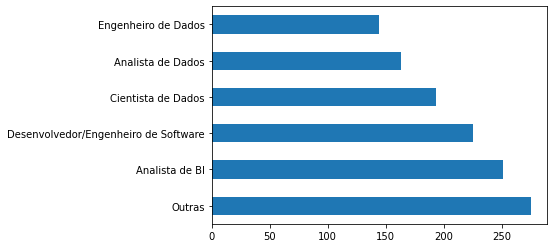

In [31]:
#Profissões

dados['profissao'].value_counts().plot(kind = 'barh')

In [33]:
#Salários por grupos - Profissão

dados.groupby('profissao').mean()['salario'].round(2)

profissao
Analista de BI                          4978.09
Analista de Dados                       5036.81
Cientista de Dados                      6831.61
Desenvolvedor/Engenheiro de Software    5133.33
Engenheiro de Dados                     7802.08
Outras                                  4854.55
Name: salario, dtype: float64

In [34]:
#Idades por profissao

dados.groupby('profissao').mean()["('P1', 'age')"]

profissao
Analista de BI                          29.330645
Analista de Dados                       28.840491
Cientista de Dados                      28.182292
Desenvolvedor/Engenheiro de Software    29.153153
Engenheiro de Dados                     29.157143
Outras                                  30.238806
Name: ('P1', 'age'), dtype: float64

In [36]:
#Media salarial por genero
dados.groupby('sexo').mean()['salario']

sexo
Feminino     5343.173432
Masculino    6490.438247
Name: salario, dtype: float64

In [37]:
dados.groupby('sexo').describe()['salario']

#Numero alto de profissionais do sexo masculino

,count,mean,std,min,25%,50%,75%,max
sexo,,,,,,,,
Feminino,271.0,5343.173432,3819.581551,1000.0,2500.0,5000.0,7000.0,22500.0
Masculino,1255.0,6490.438247,4769.184816,1000.0,3500.0,5000.0,10000.0,25000.0


In [39]:
#Salário por tamanho de empresa

dados.groupby('tamanho_da_empresa').describe()['salario']

,count,mean,std,min,25%,50%,75%,max
tamanho_da_empresa,,,,,,,,
Grande,557.0,7018.850987,4804.646295,1000.0,3500.0,5000.0,10000.0,25000.0
Média,505.0,6266.336634,4468.236159,1000.0,3500.0,5000.0,7000.0,25000.0
Pequena,465.0,5420.430108,4461.897094,1000.0,2500.0,3500.0,7000.0,25000.0


In [40]:
#Salário por faixa etária
dados.groupby('idade').describe()['salario']

,count,mean,std,min,25%,50%,75%,max
idade,,,,,,,,
"[18,24]",324.0,3083.333333,2430.616123,1000.0,1500.0,2500.0,3500.0,22500.0
"[25,30]",565.0,5466.371681,3533.367053,1000.0,3500.0,5000.0,7000.0,25000.0
"[31,40]",507.0,8417.159763,5034.862789,1000.0,5000.0,7000.0,10000.0,25000.0
"[41,50]",110.0,9590.909091,5277.258557,1000.0,5000.0,10000.0,10000.0,25000.0


In [ ]:
#Experiencia dos Cientistas de dados

cds = dados[ dados ['profissao'] == 'Cientista de Dados']
cds


In [ ]:
#Salário Médio - de acordo com as experiencias
cds.groupby(['experiencia_ds']).describe()['salario']

In [ ]:
#Area de Formação dos Cientistas de dados
cds.groupby(['area_de_formacao']).describe()['salario']


In [56]:
#Usando duas variaveis de agrupamento
dados.groupby(['sexo','tamanho_da_empresa']).mean()['salario']

sexo       tamanho_da_empresa
Feminino   Grande                6145.833333
           Média                 5642.857143
           Pequena               3961.038961
Masculino  Grande                7214.130435
           Média                 6416.461916
           Pequena               5710.051546
Name: salario, dtype: float64

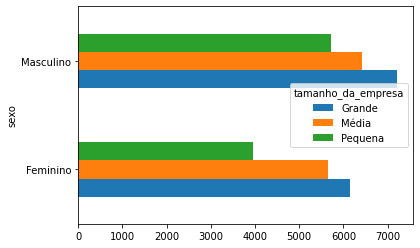

In [58]:
#Usando duas variaveis de agrupamento
#Usando a função unstack
dados.groupby(['sexo','tamanho_da_empresa']).mean()['salario'].unstack(). plot( kind ="barh")


In [60]:
#Metodos mais utilizados pelos cientistas de dados

cds.filter(regex = "P20").mean().sort_values(ascending=False)

('P20', 'linear_regression')             0.740933
('P20', 'logistic_regression')           0.673575
('P20', 'decision_tree')                 0.652850
('P20', 'random_forest')                 0.647668
('P20', 'cluster_analysis')              0.601036
('P20', 'neural_networks')               0.461140
('P20', 'gradient_boosted_machines')     0.445596
('P20', 'ensemble')                      0.398964
('P20', 'nlp')                           0.352332
('P20', 'bayesian_inference')            0.321244
('P20', 'svms')                          0.305699
('P20', 'glms')                          0.290155
('P20', 'rnns')                          0.181347
('P20', 'longitudinal_data_analysis')    0.176166
('P20', 'cnns')                          0.165803
('P20', 'markov_chains')                 0.134715
('P20', 'survival_analysis')             0.134715
('P20', 'joint analysis')                0.067358
('P20', 'gans')                          0.046632
('P20', 'hmms')                          0.041451


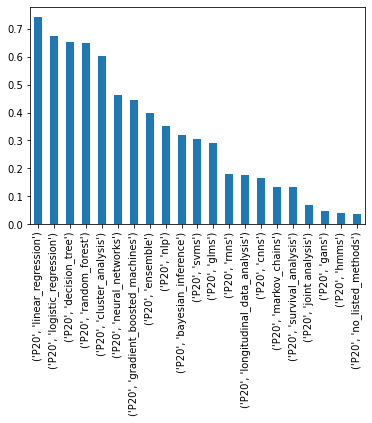

In [61]:
#Metodos mais utilizados pelos cientistas de dados

cds.filter(regex = "P20").mean().sort_values(ascending=False).plot(kind= "bar")

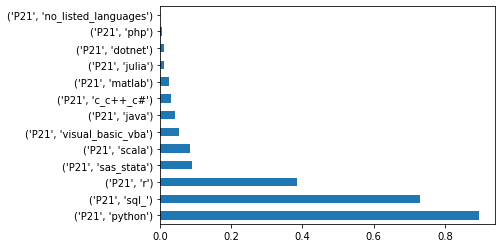

In [62]:
#Linguagens de Programação mais utilizadas pelos cientistas de dados

cds.filter(regex = "P21").mean().sort_values(ascending=False).plot(kind= "barh")